In [1]:
import numpy as np
import pandas as pd

In [2]:
mks = pd.read_csv("data/MKSfull.csv")

In [3]:
#data preprocessing 
#remove NaN values
nans = mks[mks['Close'].isnull()]
mks.drop(nans.index, inplace=True) 

In [4]:
# Initialize a data frames to hold the Features and the value
X_len = 7000
days = 10

Χ_columns = []
for j in range(days):
    Χ_columns.append('i+%s' % str(j))
    
X = pd.DataFrame(index=range(X_len),columns = Χ_columns)
y = pd.DataFrame(index=range(X_len), columns = ['Close'])

    
for i in range(X_len):
    for j in range(days):
        X.iloc[i]['i+%s' % str(j)] = mks.iloc[i + j]['Close']
    y.iloc[i] = mks.iloc[(i + j + 1)]['Close']
    
v = pd.concat([X, y], axis=1)
v.head()

,i+0,i+1,i+2,i+3,i+4,i+5,i+6,i+7,i+8,i+9,Close
0,249.86,254.221,265.437,260.452,261.699,261.699,262.945,260.452,256.714,251.729,245.498
1,254.221,265.437,260.452,261.699,261.699,262.945,260.452,256.714,251.729,245.498,245.498
2,265.437,260.452,261.699,261.699,262.945,260.452,256.714,251.729,245.498,245.498,251.729
3,260.452,261.699,261.699,262.945,260.452,256.714,251.729,245.498,245.498,251.729,246.745
4,261.699,261.699,262.945,260.452,256.714,251.729,245.498,245.498,251.729,246.745,245.498


In [5]:
dv = pd.DataFrame(index=range(X_len), columns = ['dv'])
dv.iloc[0] = 0
for i in range(1, X_len):
    dv.iloc[i] = mks.iloc[i]['Close'] - mks.iloc[i - 1]['Close']    
np.sqrt((dv ** 2).mean())

dv    7.558524
dtype: float64

In [6]:
def split_train_test_set(X, y, test_size=0.2):  
    # Train-test split
    if len(X) != len(y):
        return "Error"
    split_index = int(len(X) * (1-test_size))
    X_train = X[:split_index]
    X_test = X[split_index:]
    y_train = y[:split_index]
    y_test = y[split_index:]
    
    return X_train, X_test, y_train, y_test

In [7]:
# Import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error

def rmsp(test, pred):
    return np.sqrt(np.mean(((test - pred)/test)**2)) * 100

def rmse(test, pred):
    return np.sqrt(((test - pred) ** 2).mean())

def print_metrics(test, pred):
    print('RMSE %f'%  rmse(test, pred))
    print('Root Mean Squared Percentage Error %f'% rmsp(test, pred))
    print('Mean Absolute Error: %f'% mean_absolute_error(test, pred))
    print('Explained Variance Score: %f'% explained_variance_score(test, pred))
    print('Mean Squared Error: %f'% mean_squared_error(test, pred))
    print('R2 score: %f'% r2_score(test, pred))
    print('')


def create_cv_sets(n_splits, size):
    cv_sets = []
    for index in range(n_splits):
        X_train, X_test, y_train, y_test = split_train_test_set(X[index:index + size], y[index:index + size])    
        cv_sets.append([X_train, X_test, y_train, y_test])
    return cv_sets 

n_splits = 7
size =1000

cv_sets = create_cv_sets(n_splits, size)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn import grid_search
from sklearn.model_selection import GridSearchCV
def fit_model(X, y):
    regressor = LinearRegression()
    parameters = {'fit_intercept':[True, False], 'normalize':[True, False], 'copy_X':[True, False]}
    grid = GridSearchCV(regressor, parameters)
    grid.fit(X_train, y_train)
    return grid.best_estimator_

C:\Playground\venvs\mlnd-capstone-363\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Playground\venvs\mlnd-capstone-363\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [9]:
lr_regs = []
lr_errs=[]
for X_train, X_test, y_train, y_test in cv_sets:
    lr_reg = fit_model(X_train, y_train)
    lr_regs.append(lr_reg)
    pred = lr_reg.predict(X_test)
    lr_errs.append(rmse(y_test, pred))
    print_metrics(y_test, pred)

RMSE 4.828894
Root Mean Squared Percentage Error 1.082763
Mean Absolute Error: 3.709067
Explained Variance Score: 0.974417
Mean Squared Error: 23.318220
R2 score: 0.974371

RMSE 4.842967
Root Mean Squared Percentage Error 1.085132
Mean Absolute Error: 3.732799
Explained Variance Score: 0.974816
Mean Squared Error: 23.454328
R2 score: 0.974760

RMSE 4.796163
Root Mean Squared Percentage Error 1.072344
Mean Absolute Error: 3.700744
Explained Variance Score: 0.975834
Mean Squared Error: 23.003181
R2 score: 0.975730

RMSE 4.785782
Root Mean Squared Percentage Error 1.068607
Mean Absolute Error: 3.691811
Explained Variance Score: 0.976295
Mean Squared Error: 22.903712
R2 score: 0.976170

RMSE 4.792780
Root Mean Squared Percentage Error 1.068653
Mean Absolute Error: 3.698223
Explained Variance Score: 0.976387
Mean Squared Error: 22.970741
R2 score: 0.976264

RMSE 4.757853
Root Mean Squared Percentage Error 1.059355
Mean Absolute Error: 3.663104
Explained Variance Score: 0.976941
Mean Squared

In [52]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10,5

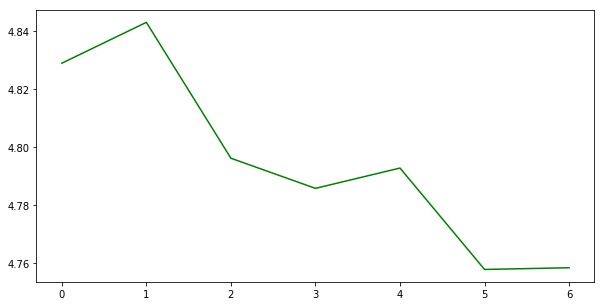

In [53]:
t = range(n_splits)
plt.plot(t, lr_errs, 'g', label='Linear Regression Error')
plt.show()

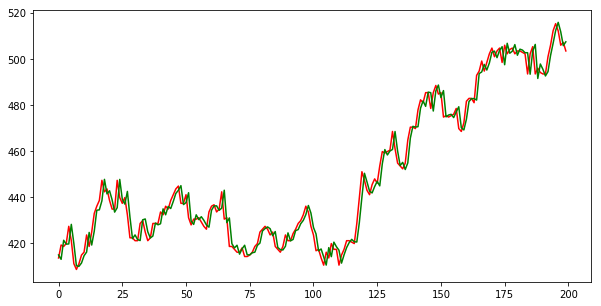

In [54]:
t = range(len(y_test))
plt.plot(t, y_test, 'r', label='Actual')
plt.plot(t, lr_regs[0].predict(X_test), 'g', label='Prediction')
plt.show()

In [55]:
lr_regs[0].coef_

array([[ 0.00651374,  0.02583535,  0.02437921, -0.01885374,  0.01484998,
        -0.13749529,  0.17799584, -0.05733284, -0.08866287,  1.05339711]])

In [56]:
from sklearn.linear_model import Ridge 

def ridge(X_train, X_test, y_train, y_test):
    r_reg = Ridge()
    r_reg.fit(X_train, y_train)
    return r_reg

In [57]:
rr_regs=[]
rr_errs=[]
for X_train, X_test, y_train, y_test in cv_sets:
    rr_reg = ridge(X_train,X_test,y_train,y_test)
    pred = rr_reg.predict(X_test)
    rr_regs.append(rr_reg)
    rr_errs.append(rmse(y_test, pred))
    print_metrics(y_test, pred)    

RMSE 4.869521
Root Mean Squared Percentage Error 1.089557
Mean Absolute Error: 3.762083
Explained Variance Score: 0.974412
Mean Squared Error: 23.712231
R2 score: 0.973938

RMSE 4.890978
Root Mean Squared Percentage Error 1.093220
Mean Absolute Error: 3.795264
Explained Variance Score: 0.974795
Mean Squared Error: 23.921670
R2 score: 0.974257

RMSE 4.858452
Root Mean Squared Percentage Error 1.083374
Mean Absolute Error: 3.776117
Explained Variance Score: 0.975816
Mean Squared Error: 23.604551
R2 score: 0.975095

RMSE 4.848795
Root Mean Squared Percentage Error 1.080062
Mean Absolute Error: 3.765104
Explained Variance Score: 0.976303
Mean Squared Error: 23.510815
R2 score: 0.975538

RMSE 4.859070
Root Mean Squared Percentage Error 1.080956
Mean Absolute Error: 3.775815
Explained Variance Score: 0.976423
Mean Squared Error: 23.610558
R2 score: 0.975603

RMSE 4.818871
Root Mean Squared Percentage Error 1.070383
Mean Absolute Error: 3.738977
Explained Variance Score: 0.976954
Mean Squared

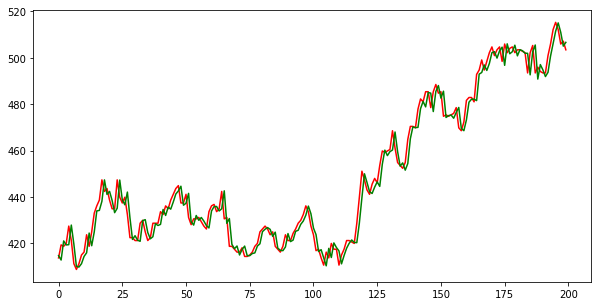

In [58]:
t = range(len(y_test))
plt.plot(t, y_test, 'r', label='Actual')
plt.plot(t, rr_regs[1].predict(X_test), 'g', label='Prediction')
plt.show()

In [59]:
rr_regs[1].coef_

array([[ 0.00425511,  0.02326752,  0.02887893, -0.0211307 ,  0.01547421,
        -0.13709511,  0.17784227, -0.05709013, -0.08828309,  1.0498419 ]])

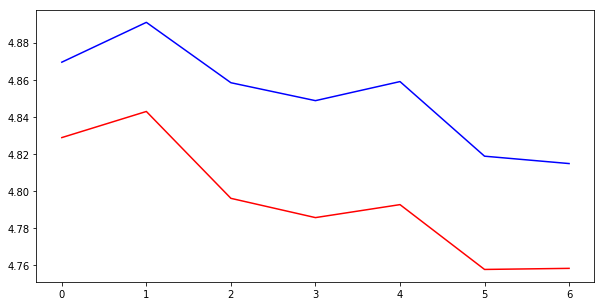

In [60]:
t = range(n_splits)
plt.plot(t, lr_errs, 'r', label='Linear Regression Error')
plt.plot(t, rr_errs, 'b', label='Ridge Error')
plt.show()

In [61]:
from sklearn.svm import LinearSVR
def lsvr(X_train, X_test, y_train, y_test):
    svr = LinearSVR()
    svr.fit(X_train, y_train.values.ravel())
    return svr

In [62]:
svrs=[]
svr_errs=[]
for X_train, X_test, y_train, y_test in cv_sets: 
    svr = lsvr(X_train, X_test, y_train, y_test)
    svrs.append(svr)
    pred = svr.predict(X_test)
    svr_errs.append(rmse(y_test.values.ravel(), pred)) 
    print_metrics(y_test.values.ravel(), pred)


RMSE 16.593039
Root Mean Squared Percentage Error 3.692301
Mean Absolute Error: 15.845841
Explained Variance Score: 0.973360
Mean Squared Error: 275.328928
R2 score: 0.697388

RMSE 10.688391
Root Mean Squared Percentage Error 2.371007
Mean Absolute Error: 9.660491
Explained Variance Score: 0.974390
Mean Squared Error: 114.241692
R2 score: 0.877062

RMSE 5.143858
Root Mean Squared Percentage Error 1.158504
Mean Absolute Error: 3.976132
Explained Variance Score: 0.975832
Mean Squared Error: 26.459273
R2 score: 0.972083

RMSE 11.349150
Root Mean Squared Percentage Error 2.548210
Mean Absolute Error: 10.297731
Explained Variance Score: 0.975709
Mean Squared Error: 128.803214
R2 score: 0.865986

RMSE 6.744573
Root Mean Squared Percentage Error 1.514258
Mean Absolute Error: 5.554692
Explained Variance Score: 0.976172
Mean Squared Error: 45.489263
R2 score: 0.952995

RMSE 4.789310
Root Mean Squared Percentage Error 1.064793
Mean Absolute Error: 3.701620
Explained Variance Score: 0.977006
Mean

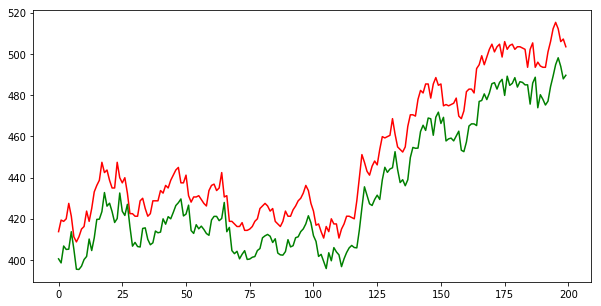

In [63]:
t = range(len(y_test))
plt.plot(t, y_test, 'r', label='Actual')
plt.plot(t, svrs[0].predict(X_test), 'g', label='Prediction')
plt.show()

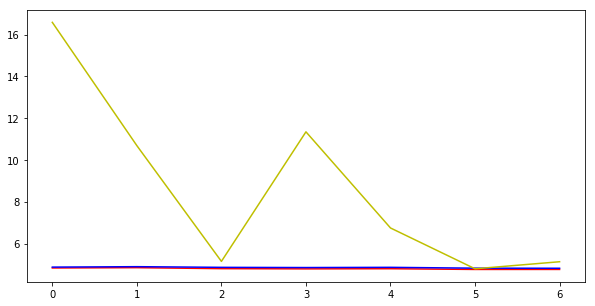

In [64]:
t = range(n_splits)
plt.plot(t, lr_errs, 'r', label='Linear Regression Error')
plt.plot(t, rr_errs, 'b', label='Ridge Error')
plt.plot(t, svr_errs, 'y', label='SVR Error')
plt.show()

In [65]:
last = np.array([310.5,312.5, 313.5,316.200012,316.299988,314.799988,316.100006,320.5,308.79998,308.700012]).reshape(1,-1)
pred = lr_regs[0].predict(last)
pred

array([[308.88484237]])

In [66]:
last = np.array([316.200012, 316.299988,314.799988,316.100006,320.5,308.799988,313.700012,310.80,318.30,324.00]).reshape(1,-1)
pred = lr_regs[0].predict(last)
pred


array([[325.34466854]])

In [68]:
from sklearn.externals import joblib
joblib.dump(lr_regs[0], 'prediction_model.pkl') 

['prediction_model.pkl']